Goal: 
1. For a polygon of interest,fetch:   
    a. DW  
    b. NDWI  
    c. mNDWI  
    d. timeseries of NDWI  
    e. timeseries of mNDWI  
    f. any other ground truth
    g. IndiaSAT output

In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install geopandas
# !pip install matplotlib

In [ ]:
# !pip install earthengine-api

In [ ]:
# !pip install openpyxl
# !pip install geemap

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import ee
import geemap

import matplotlib.dates as mdates
from datetime import datetime

In [2]:
ee.Authenticate()
ee.Initialize()

In [3]:
CLOUD_THRESHOLD_PCT = 35

Load desilting points

In [4]:
# desilting_points_gdf = pd.read_excel(
#     os.path.join(
#         os.getenv('DATA'),
#         'ATECF',
#         'NITI - MP & UP.xlsx'),
#         sheet_name=None)

In [5]:
# desilting_points_gdf = pd.concat(desilting_points_gdf,ignore_index=True)

In [6]:
# desilting_points_gdf.shape

In [7]:
# desilting_points_gdf.columns

In [8]:
# desilting_points_gdf.drop(['Sr no.'],axis=1,inplace=True)

In [9]:
# def valid_lat_lng(lat,lng):
#     if (-90 <= lat <= 90):
#         if (-180 <= lng <= 180):
#             return True
#     return False

In [10]:
# desilting_points_gdf['valid_lat_lng'] = desilting_points_gdf.apply(lambda x:valid_lat_lng(lat=x['Latitude'],lng=x['Longitude']),axis=1)

In [11]:
# desilting_points_gdf['valid_lat_lng'].value_counts()

In [12]:
# desilting_points_gdf[desilting_points_gdf['valid_lat_lng'] == False]

Currently dropping invalid lat,lng points 
- But clearly in some cases there is only error of placement of decimal point within these, so the values can be corrected too 

In [13]:
# desilting_points_gdf = desilting_points_gdf[desilting_points_gdf['valid_lat_lng'] == True]
# desilting_points_gdf.shape

In [14]:
# desilting_points_gdf['geometry'] = gpd.points_from_xy(
#     desilting_points_gdf['Longitude'],
#     desilting_points_gdf['Latitude'])

In [15]:
# desilting_points_gdf = gpd.GeoDataFrame(desilting_points_gdf,
#                                         crs='epsg:4326'
#                                         )

In [16]:
# desilting_points_gdf.columns

Load SWB vectors

In [17]:
path =  os.path.join(os.getenv('DATA'),
        'ATECF/new')

In [18]:
files_list = os.listdir(
    os.path.join(
        os.getenv('DATA'),
        'ATECF/new')
)

files_list

['WaterRejapp-ATECF_UP_WB_13.json',
 'WaterRejapp-ATECF_MP_RAJGARH_16.json',
 'WaterRejapp-ATECF_MP_CHATTARPUR_15.json']

In [19]:
swbs_gdf = []

In [20]:
for file in files_list:
    swbs_gdf.append(
        gpd.GeoDataFrame.from_file(
            os.path.join(
                path,
                file
            )))

In [21]:
len(swbs_gdf)

3

In [22]:
swbs_gdf = pd.concat(swbs_gdf)

In [23]:
swbs_gdf.shape

(160, 48)

In [24]:
swbs_gdf.columns

Index(['id', 'District', 'MWS_UID', 'State', 'Taluka', 'UID', 'any',
       'area_17-18', 'area_18-19', 'area_19-20', 'area_20-21', 'area_21-22',
       'area_22-23', 'area_23-24', 'area_ored', 'category_sq_m',
       'desiltingpoint_lat', 'desiltingpoint_lon', 'k_17-18', 'k_18-19',
       'k_19-20', 'k_20-21', 'k_21-22', 'k_22-23', 'k_23-24', 'kr_17-18',
       'kr_18-19', 'kr_19-20', 'kr_20-21', 'kr_21-22', 'kr_22-23', 'kr_23-24',
       'krz_17-18', 'krz_18-19', 'krz_19-20', 'krz_20-21', 'krz_21-22',
       'krz_22-23', 'krz_23-24', 'latitude', 'longitude', 'matched',
       'name_of_ngo', 'slit_excavated', 'village', 'water', 'waterbody_name',
       'geometry'],
      dtype='object')

In [25]:
swbs_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Specific waterbody indepth analysis

In [ ]:
swbs_gdf[swbs_gdf.waterbody_name.str.contains('Pokhari')]

,id,District,MWS_UID,State,Taluka,UID,any,area_17-18,area_18-19,area_19-20,...,krz_23-24,latitude,longitude,matched,name_of_ngo,slit_excavated,village,water,waterbody_name,geometry
0,WaterRejapp-ATECF_UP_WB_13.1,Fatehpur,12_300616,Uttar Pradesh,Bahua,12_300616_481,1,0.0,0.06,0.14,...,0.0,25.841441,80.701205,True,Development Alternatives,16702.0,Ayah,1,Naychaha Talab,"MULTIPOLYGON (((80.70096 25.8413, 80.7015 25.8..."


In [27]:
# swbs_gdf[swbs_gdf['waterbody_name'] == 'Pokhari Talab - Saraiyan']

In [ ]:
swb_gdf = swbs_gdf[swbs_gdf['waterbody_name'] == 'Pokhari Talab - Saraiyan']

In [29]:
swb_gdf

,id,District,MWS_UID,State,Taluka,UID,any,area_17-18,area_18-19,area_19-20,...,krz_23-24,latitude,longitude,matched,name_of_ngo,slit_excavated,village,water,waterbody_name,geometry
9,WaterRejapp-ATECF_UP_WB_13.10,Chitrakoot,12_166243,Uttar Pradesh,Manikpur,12_166243_970,1,0.05,0.11,1.31,...,0.0,25.011037,80.961821,True,ABSSS,6575.0,Saraiyan,1,Pokhari Talab - Saraiyan,"MULTIPOLYGON (((80.96156 25.0108, 80.96192 25...."


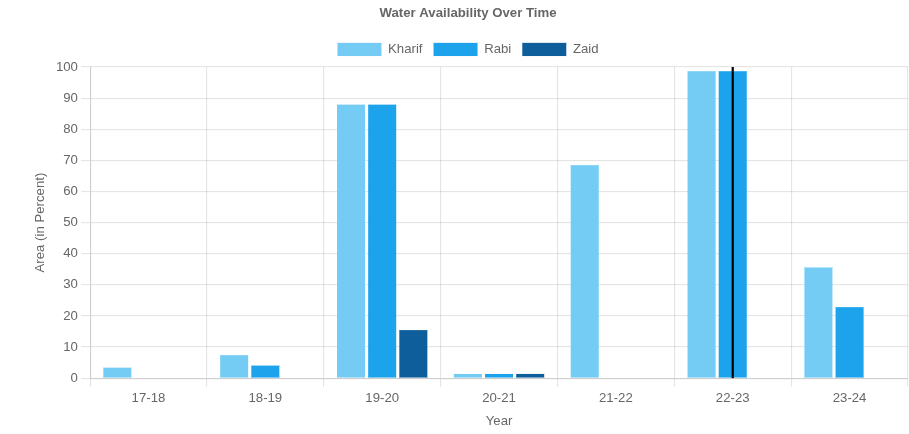

### 1. Load Dynamic World LULC 

In [30]:
START_DATE = ee.Date('2020-07-01')
END_DATE = ee.Date('2020-10-31')

In [31]:
# swb_gdf.to_file('data/pokhari_talab.geojson')
# swb_gdf.to_file('data/pokhari_talab.shp',driver='ESRI Shapefile') 

In [32]:
swb_fc = geemap.geopandas_to_ee(swb_gdf)

In [33]:
swb_fc

In [34]:
swb_fc_styled = swb_fc.style(fillColor = '00000000')

#### Fetch/compute the required indices

* DW

In [35]:
DW_imagecollection = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1')\
    .filterDate(START_DATE,END_DATE)\
    .filterBounds(swb_fc.geometry())

classification = DW_imagecollection.select('label')
DW_mode = classification.reduce(ee.Reducer.mode());

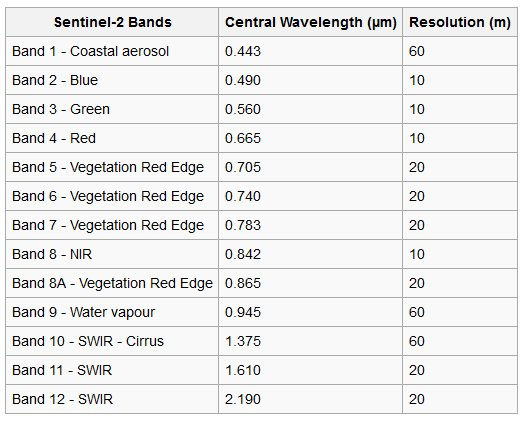

* NDWI and mNDWI

In [36]:
def add_NDWI(image):
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    return image.addBands([ndwi])

In [37]:
def add_NDVI(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
    return image.addBands([ndvi])

In [38]:
def add_mNDWI(image):
    mNDWI = image.normalizedDifference(['B3','B11']).rename('mNDWI')
    return image.addBands(['mndwi'])

In [39]:
S2_SR = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')

In [40]:
ndwi_collection = S2_SR\
    .filterBounds(swb_fc.geometry())\
    .filterDate(START_DATE,END_DATE)\
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', CLOUD_THRESHOLD_PCT))\
    .map(add_NDWI).select('NDWI');

In [41]:
ndvi_collection = S2_SR.filterBounds(swb_fc.geometry())\
.filterDate(START_DATE,END_DATE)\
.filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', CLOUD_THRESHOLD_PCT))\
.map(add_NDVI).select('NDVI');

In [42]:
mndwi_collection = S2_SR.filterBounds(swb_fc.geometry())\
.filterDate(START_DATE,END_DATE)\
.filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', CLOUD_THRESHOLD_PCT))\
.map(add_NDVI).select('NDVI');

In [43]:
S1 = ee.ImageCollection('COPERNICUS/S1_GRD')

In [46]:
vv_collection = S1\
    .filterBounds(swb_fc.geometry())\
    .filterDate(START_DATE,END_DATE)\
    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV'))\
    .select('VV');

* Plot mode values 

In [47]:
CLASS_NAMES_DW = [
    'water',
    'trees',
    'grass',
    'flooded_vegetation',
    'crops',
    'shrub_and_scrub',
    'built',
    'bare',
    'snow_and_ice',
]

VIS_PALETTE_DW = [
    '419bdf',
    '397d49',
    '88b053',
    '7a87c6',
    'e49635',
    'dfc35a',
    'c4281b',
    'a59b8f',
    'b39fe1',
]

In [48]:
Map = geemap.Map()
vis_params = {'min': 0,
              'max': 8,
              'palette' : VIS_PALETTE_DW
              }

Map.addLayer(DW_mode, vis_params, 'DW')

outline_vis_params = {
        'color': 'FF0000',  # Red color for the outline (hex code)
        'width': 2          # Line width in pixels
    }

NDWI_mode = ndwi_collection.mode()
  
Map.addLayer(
    NDWI_mode,
    {'palette' : ['red', 'yellow', 'green', 'cyan', 'blue']},
    'NDWI');

NDVI_mode = ndvi_collection.mode()

Map.addLayer(
    NDVI_mode,
    {'palette' : ['red', 'yellow', 'green', 'cyan', 'blue']},
    'NDVI');

mNDWI_mode = mndwi_collection.mode()

Map.addLayer(
    mNDWI_mode,
    {'palette' : ['red', 'yellow', 'green', 'cyan', 'blue']},
    'mNDWI');

Map.addLayer(swb_fc_styled,outline_vis_params)
Map.centerObject(swb_fc)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [50]:
print("No of images = ",ndwi_collection.size().getInfo())

No of images =  11


- Plot NDWI timeseries and mNDWI timeseries 

In [51]:
def extract_ndvi_timeseries(image):
    """Extract mean NDVI for the polygon"""
    stats = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=swb_fc.geometry(),
        scale=10,  # 10m resolution
        maxPixels=1e9
    )
    
    return ee.Feature(None, {
        'date': image.date().format('YYYY-MM-dd'),
        'ndvi_mean': stats.get('NDVI'),
        'system_time': image.get('system:time_start')
    })

In [52]:
ndvi_timeseries = ndvi_collection.map(extract_ndvi_timeseries)
ndvi_timeseries = ndvi_timeseries.getInfo()

In [53]:
len(ndvi_timeseries['features'])

11

In [54]:
results = []
for feature in ndvi_timeseries['features']:
    props = feature['properties']
    if props['ndvi_mean'] is not None:  # Skip null values
        results.append({
            'date': pd.to_datetime(props['date']),
            'ndvi_mean': props['ndvi_mean'],
            'timestamp': props['system_time']
        })

ndvi_timeseries_df = pd.DataFrame(results)
if not ndvi_timeseries_df.empty:
    ndvi_timeseries_df = ndvi_timeseries_df.sort_values('date').reset_index(drop=True)

In [55]:
ndvi_timeseries_df

,date,ndvi_mean,timestamp
0,2020-08-31,0.158386,1598851322991
1,2020-09-05,-0.008126,1599283324193
2,2020-09-10,0.061312,1599715322221
3,2020-09-15,0.150083,1600147324075
4,2020-09-25,-0.184297,1601011325095
5,2020-09-30,0.180266,1601443322906
6,2020-10-05,0.117212,1601875325606
7,2020-10-10,0.090796,1602307323479
8,2020-10-15,0.002072,1602739325515
9,2020-10-25,0.067580,1603603325099


In [56]:
def extract_ndwi_timeseries(image):
    """Extract mean NDWI for the polygon"""
    stats = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=swb_fc.geometry(),
        scale=10,  # 10m resolution
        maxPixels=1e9
    )
    
    return ee.Feature(None, {
        'date': image.date().format('YYYY-MM-dd'),
        'ndwi_mean': stats.get('NDWI'),
        'system_time': image.get('system:time_start')
    })

In [57]:
ndwi_timeseries = ndwi_collection.map(extract_ndwi_timeseries)
ndwi_timeseries = ndwi_timeseries.getInfo()

In [58]:
results = []
for feature in ndwi_timeseries['features']:
    props = feature['properties']
    if props['ndwi_mean'] is not None:  # Skip null values
        results.append({
            'date': pd.to_datetime(props['date']),
            'ndwi_mean': props['ndwi_mean'],
            'timestamp': props['system_time']
        })

ndwi_timeseries_df = pd.DataFrame(results)
if not ndwi_timeseries_df.empty:
    ndwi_timeseries_df = ndwi_timeseries_df.sort_values('date').reset_index(drop=True)

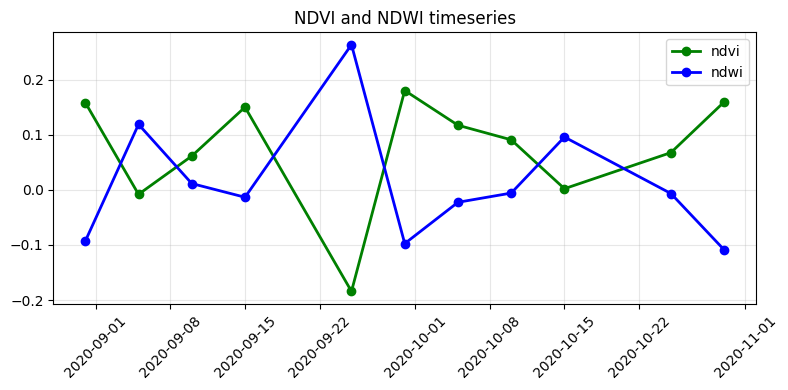

In [120]:
plt.figure(figsize=(8, 4))
plt.plot(ndvi_timeseries_df['date'],ndvi_timeseries_df['ndvi_mean'],marker = 'o',linewidth = 2,color = 'green',label = 'ndvi')
plt.plot(ndwi_timeseries_df['date'],ndwi_timeseries_df['ndwi_mean'],marker = 'o',linewidth = 2,color = 'blue',label = 'ndwi')
plt.title('NDVI and NDWI timeseries')
plt.xticks(rotation=45);
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

* Generate data for all years

In [60]:
years_list = [2017,2018,2019,2020,2021,2022,2023]

START_DATE_LIST_KHARIF = [str(x) + '-07-01' for x in years_list]
print(START_DATE_LIST_KHARIF)

END_DATE_LIST_KHARIF = [str(x) + '-10-31' for x in years_list]
print(END_DATE_LIST_KHARIF)

['2017-07-01', '2018-07-01', '2019-07-01', '2020-07-01', '2021-07-01', '2022-07-01', '2023-07-01']
['2017-10-31', '2018-10-31', '2019-10-31', '2020-10-31', '2021-10-31', '2022-10-31', '2023-10-31']


In [61]:
def get_NDVI_timeseries(start_date,end_date,cloud_pct,geometry):
    ndvi_collection = S2_SR\
    .filterBounds(geometry)\
    .filterDate(start_date,end_date)\
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', cloud_pct))\
    .map(add_NDVI).select('NDVI');

    ndvi_timeseries = ndvi_collection.map(extract_ndvi_timeseries)
    ndvi_timeseries = ndvi_timeseries.getInfo()

    results = []
    for feature in ndvi_timeseries['features']:
        props = feature['properties']
        if props['ndvi_mean'] is not None:  # Skip null values
            results.append({
                'date': pd.to_datetime(props['date']),
                'ndvi_mean': props['ndvi_mean'],
                'timestamp': props['system_time']
            })

    ndvi_timeseries_df = pd.DataFrame(results)
    if not ndvi_timeseries_df.empty:
        ndvi_timeseries_df = ndvi_timeseries_df.sort_values('date').reset_index(drop=True)

    return ndvi_timeseries_df

In [62]:
ndvi_timeseries_yearwise_df = []
for ind in range(len(START_DATE_LIST_KHARIF)):
    start_date = START_DATE_LIST_KHARIF[ind]
    end_date = END_DATE_LIST_KHARIF[ind]
    season_ndvi = get_NDVI_timeseries(start_date,end_date,CLOUD_THRESHOLD_PCT,swb_fc.geometry())
    ndvi_timeseries_yearwise_df.append(season_ndvi)
ndvi_timeseries_yearwise_df = pd.concat(ndvi_timeseries_yearwise_df)


In [63]:
ndvi_timeseries_yearwise_df.shape

(49, 3)

In [64]:
ndvi_timeseries_yearwise_df.drop(['timestamp'],axis=1,inplace=True)


In [65]:
ndvi_timeseries_yearwise_df.head()

,date,ndvi_mean
0,2019-07-18,0.231034
1,2019-08-27,0.220482
2,2019-09-01,0.433993
3,2019-09-21,0.215282
4,2019-10-06,0.289325


In [66]:
def get_NDWI_timeseries(start_date,end_date,cloud_pct,geometry):
    ndwi_collection = S2_SR\
    .filterBounds(geometry)\
    .filterDate(start_date,end_date)\
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', cloud_pct))\
    .map(add_NDWI).select('NDWI');

    ndwi_timeseries = ndwi_collection.map(extract_ndwi_timeseries)
    ndwi_timeseries = ndwi_timeseries.getInfo()

    results = []
    for feature in ndwi_timeseries['features']:
        props = feature['properties']
        if props['ndwi_mean'] is not None:  # Skip null values
            results.append({
                'date': pd.to_datetime(props['date']),
                'ndwi_mean': props['ndwi_mean'],
                'timestamp': props['system_time']
            })

    ndwi_timeseries_df = pd.DataFrame(results)
    if not ndwi_timeseries_df.empty:
        ndwi_timeseries_df = ndwi_timeseries_df.sort_values('date').reset_index(drop=True)

    return ndwi_timeseries_df

In [67]:
ndwi_timeseries_yearwise_df = []
for ind in range(len(START_DATE_LIST_KHARIF)):
    start_date = START_DATE_LIST_KHARIF[ind]
    end_date = END_DATE_LIST_KHARIF[ind]
    season_ndvi = get_NDWI_timeseries(start_date,end_date,CLOUD_THRESHOLD_PCT,swb_fc.geometry())
    ndwi_timeseries_yearwise_df.append(season_ndvi)
ndwi_timeseries_yearwise_df = pd.concat(ndwi_timeseries_yearwise_df)


In [71]:
def extract_vv_timeseries(image):
    """Extract mean VV for the polygon"""
    stats = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=swb_fc.geometry(),
        scale=10,  # 10m resolution
        maxPixels=1e9
    )
    
    return ee.Feature(None, {
        'date': image.date().format('YYYY-MM-dd'),
        'vv_mean': stats.get('VV'),
        'system_time': image.get('system:time_start')
    })

In [80]:
def get_vv_timeseries(start_date,end_date,geometry):
    vv_collection = S1\
        .filterBounds(geometry)\
        .filterDate(start_date,end_date)\
        .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV'))\
        .select('VV');

    vv_timeseries = vv_collection.map(extract_vv_timeseries)
    vv_timeseries = vv_timeseries.getInfo()

    results = []
    for feature in vv_timeseries['features']:
        props = feature['properties']
        if props['vv_mean'] is not None:  # Skip null values
            results.append({
                'date': pd.to_datetime(props['date']),
                'vv_mean': props['vv_mean'],
                'timestamp': props['system_time']
            })

    vv_timeseries_df = pd.DataFrame(results)
    if not vv_timeseries_df.empty:
        vv_timeseries_df = vv_timeseries_df.sort_values('date').reset_index(drop=True)

    return vv_timeseries_df

In [ ]:
vv_timeseries_yearwise_df = []
for ind in range(len(START_DATE_LIST_KHARIF)):
    start_date = START_DATE_LIST_KHARIF[ind]
    end_date = END_DATE_LIST_KHARIF[ind]
    # print(start_date)
    # print(end_date)
    season_ndvi = get_vv_timeseries(start_date,end_date,swb_fc.geometry())
    vv_timeseries_yearwise_df.append(season_ndvi)
vv_timeseries_yearwise_df = pd.concat(vv_timeseries_yearwise_df)

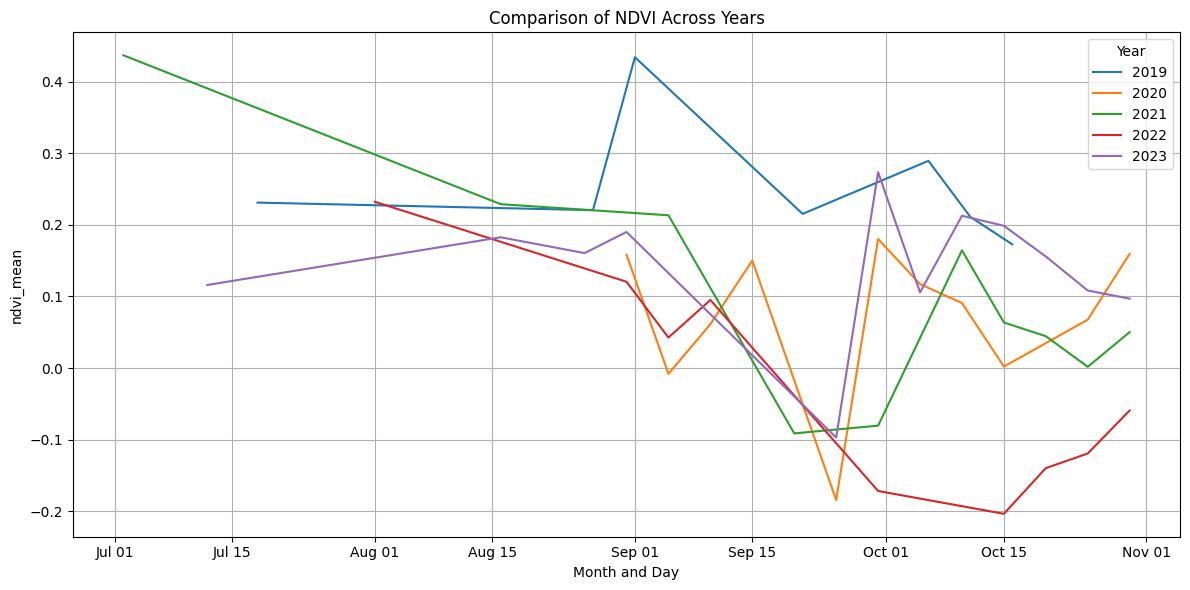

In [68]:
# Normalize the year to a common year (e.g., 2000) for plotting
ndvi_timeseries_yearwise_df['norm_date'] = ndvi_timeseries_yearwise_df['date'].apply(lambda dt: dt.replace(year=2000))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data for each year
for year, group in ndvi_timeseries_yearwise_df.groupby(ndvi_timeseries_yearwise_df['date'].dt.year):
    ax.plot(group['norm_date'], group['ndvi_mean'], label=str(year))

# Format the x-axis to show only month and day
date_format = mdates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(date_format)

# Add labels and title
ax.set_xlabel("Month and Day")
ax.set_ylabel("ndvi_mean")
ax.set_title("Comparison of NDVI Across Years")
ax.legend(title="Year")
ax.grid(True)

plt.tight_layout()
plt.show()

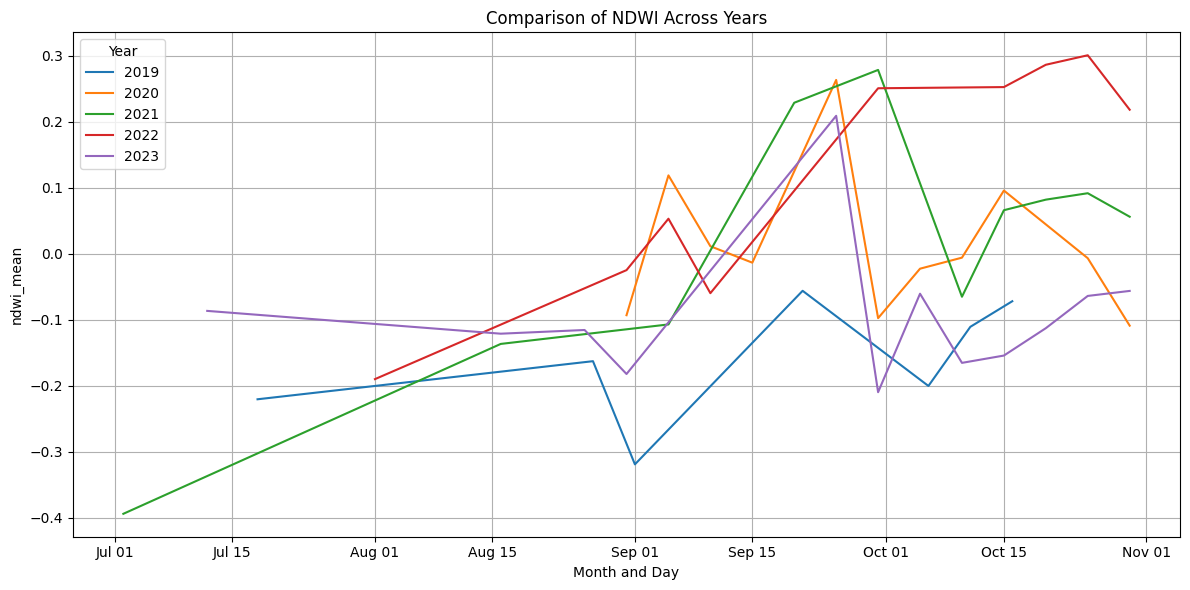

In [69]:
# Normalize the year to a common year (e.g., 2000) for plotting
ndwi_timeseries_yearwise_df['norm_date'] = ndwi_timeseries_yearwise_df['date'].apply(lambda dt: dt.replace(year=2000))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data for each year
for year, group in ndwi_timeseries_yearwise_df.groupby(ndwi_timeseries_yearwise_df['date'].dt.year):
    ax.plot(group['norm_date'], group['ndwi_mean'], label=str(year))

# Format the x-axis to show only month and day
date_format = mdates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(date_format)

# Add labels and title
ax.set_xlabel("Month and Day")
ax.set_ylabel("ndwi_mean")
ax.set_title("Comparison of NDWI Across Years")
ax.legend(title="Year")
ax.grid(True)

plt.tight_layout()
plt.show()

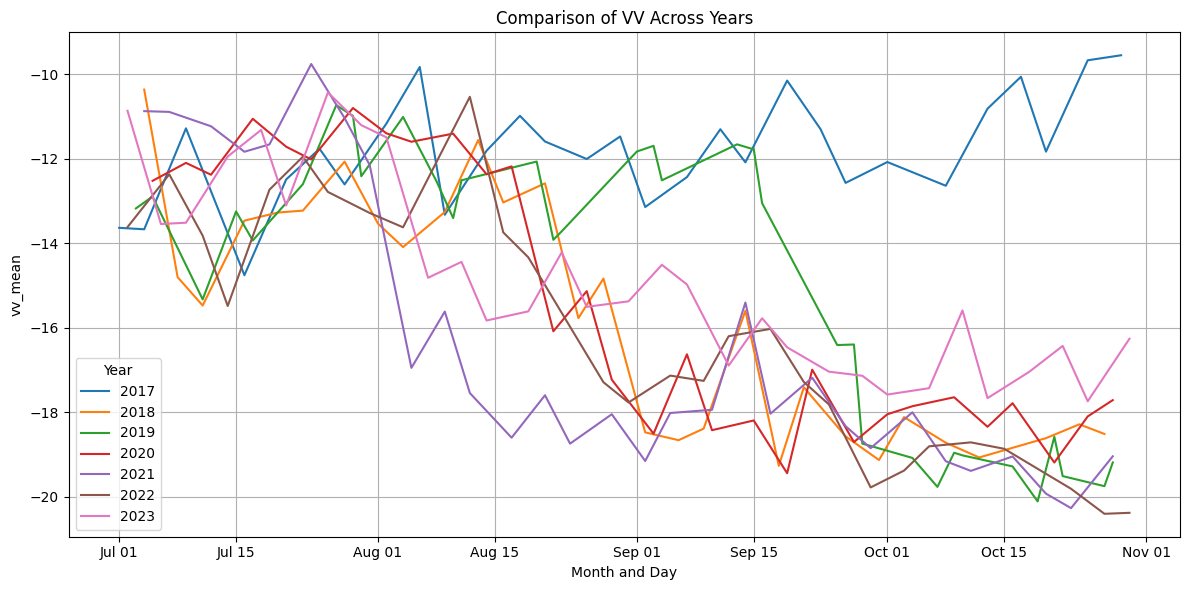

In [85]:
# Normalize the year to a common year (e.g., 2000) for plotting
vv_timeseries_yearwise_df['norm_date'] = vv_timeseries_yearwise_df['date'].apply(lambda dt: dt.replace(year=2000))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data for each year
for year, group in vv_timeseries_yearwise_df.groupby(vv_timeseries_yearwise_df['date'].dt.year):
    ax.plot(group['norm_date'], group['vv_mean'], label=str(year))

# Format the x-axis to show only month and day
date_format = mdates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(date_format)

# Add labels and title
ax.set_xlabel("Month and Day")
ax.set_ylabel("vv_mean")
ax.set_title("Comparison of VV Across Years")
ax.legend(title="Year")
ax.grid(True)

plt.tight_layout()
plt.show()

In [161]:
def generate_all_years_plot(data_df,param_name,ax):
    # Normalize the year to a common year (e.g., 2000) for plotting
    data_df['norm_date'] = data_df['date'].apply(lambda dt: dt.replace(year=2000))

    # Create the plot
    # fig, ax = plt.subplots(figsize=(6, 4))

    # Plot data for each year
    for year, group in data_df.groupby(data_df['date'].dt.year):
        ax.plot(group['norm_date'], group[param_name],'--', label=str(year))

    # Format the x-axis to show only month and day
    date_format = mdates.DateFormatter('%b %d')
    ax.xaxis.set_major_formatter(date_format)

    # Add labels and title
    ax.set_xlabel("Month and Day")
    ax.set_ylabel(param_name)
    ax.set_title(f"Comparison of {param_name} Across Years")
    ax.legend(title="Year")
    ax.grid(True)

    # plt.tight_layout()
    # plt.show()
    
    

In [162]:
import matplotlib.image as mpimg
img = mpimg.imread('data/Screenshot from 2025-06-13 15-08-49.png')

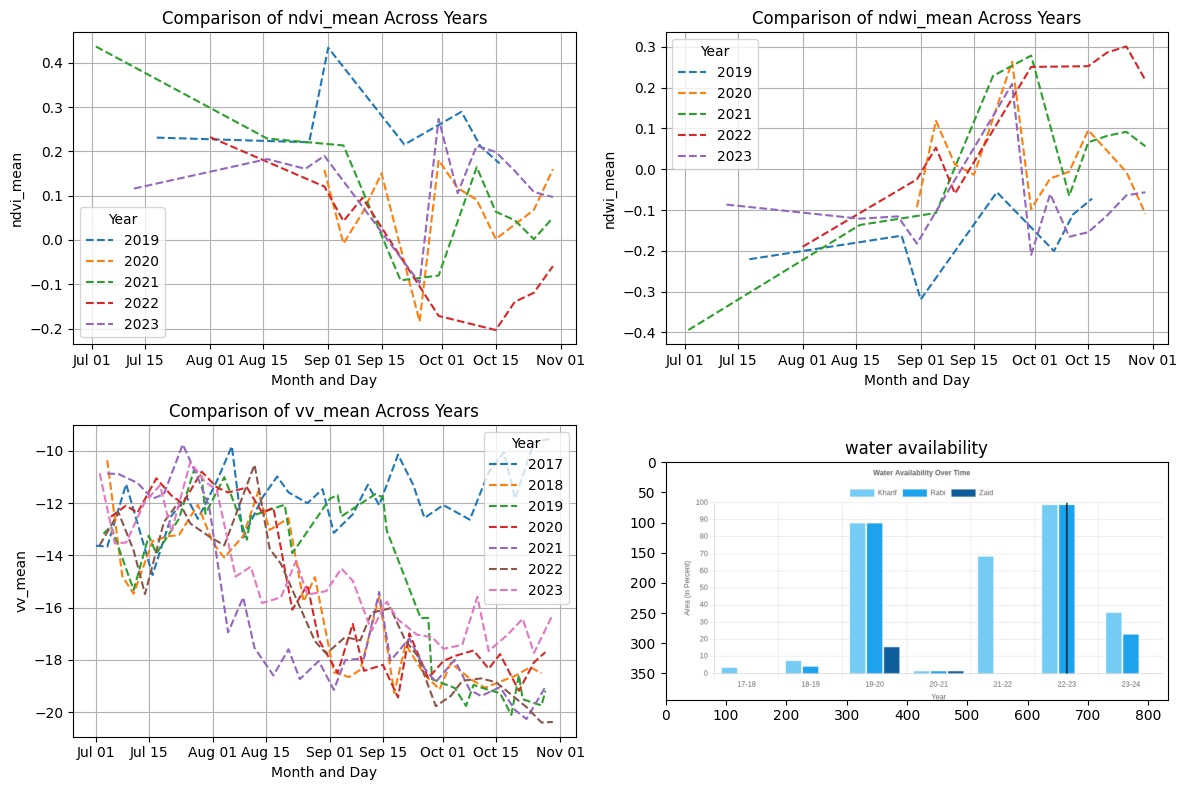

In [163]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (12,8))

generate_all_years_plot(data_df=ndvi_timeseries_yearwise_df,param_name='ndvi_mean',ax=axes[0,0])
generate_all_years_plot(data_df=ndwi_timeseries_yearwise_df,param_name='ndwi_mean',ax=axes[0,1])
generate_all_years_plot(data_df=vv_timeseries_yearwise_df,param_name='vv_mean',ax=axes[1,0])
axes[1,1].imshow(img)
axes[1,1].set_title('water availability')
plt.tight_layout()

### From Copernicus hub

![Screenshot from 2025-08-08 11-41-57.png](<attachment:Screenshot from 2025-08-08 11-41-57.png>)

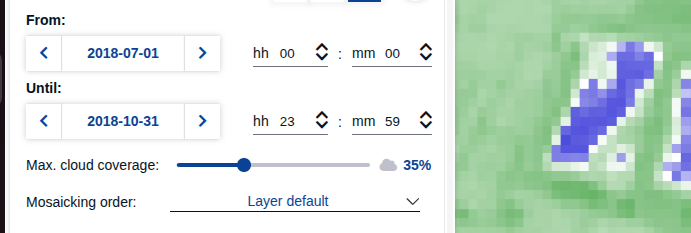

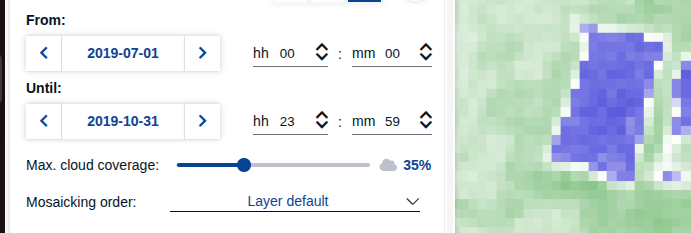

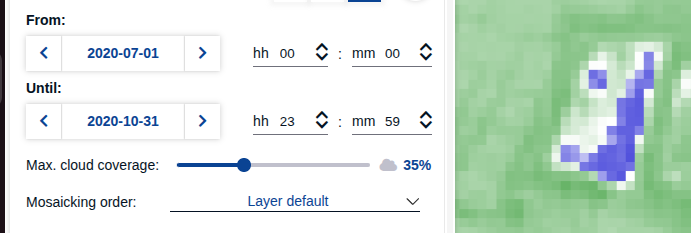

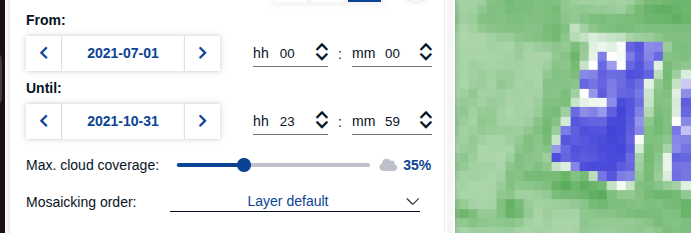

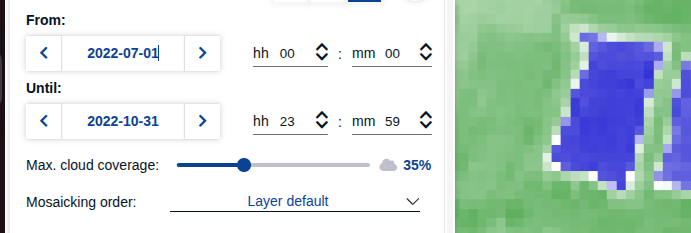

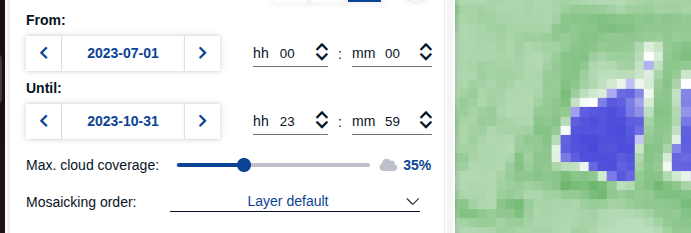
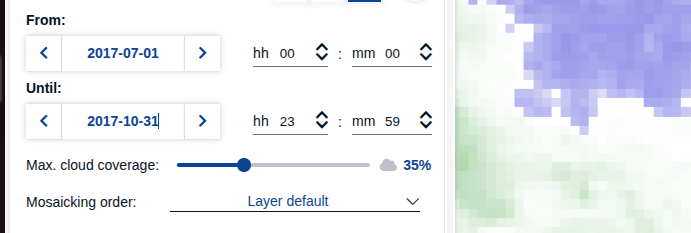

Neighboring waterbody analysis,since its found in the govt portal

In [121]:
neighboring_wb_df = pd.read_csv('data/pokhari_talab_saraiyan_neighboring_waterbody_bhuvan.csv')

In [122]:
neighboring_wb_df.rename(columns={'Unnamed: 0':'date'},inplace=True)

In [123]:
neighboring_wb_df['date'] = pd.to_datetime(neighboring_wb_df['date'])

In [124]:
kharif_months = [7,8,9,10]
rabi_months = [11,12,1,2]
zaid_months = [3,4,5,6]

In [125]:
def get_season(date):
    match date.month:
        case 7|8|9|10:
            return 'kharif'
        case 11|12|1|2:
            return 'rabi'
        case 3|4|5|6:
            return 'zaid'

In [126]:
neighboring_wb_df['date'][0]

Timestamp('2012-10-01 00:00:00')

In [127]:
neighboring_wb_df['season'] = neighboring_wb_df['date'].apply(get_season)

In [128]:
neighboring_wb_df.head()

,date,Water Spread Area (Ha),Capacity (Mcum),season
0,2012-10-01,0.0,NaN,kharif
1,2012-11-01,1.3,0.0,rabi
2,2013-09-01,0.0,NaN,kharif
3,2013-10-16,0.0,NaN,kharif
4,2013-11-16,1.6,0.0,rabi


In [129]:
def get_agri_year(date):
    match date.month:
        case 7|8|9|10|11|12:
            return date.year
        case 1|2|3|4|5|6:
            return date.year - 1

In [130]:
neighboring_wb_df['agri_year'] = neighboring_wb_df['date'].apply(get_agri_year)

In [131]:
neighboring_wb_df.head()

,date,Water Spread Area (Ha),Capacity (Mcum),season,agri_year
0,2012-10-01,0.0,NaN,kharif,2012
1,2012-11-01,1.3,0.0,rabi,2012
2,2013-09-01,0.0,NaN,kharif,2013
3,2013-10-16,0.0,NaN,kharif,2013
4,2013-11-16,1.6,0.0,rabi,2013


In [132]:
# neighboring_wb_df = neighboring_wb_df[neighboring_wb_df['agri_year'] >= 2017]

In [133]:
neighboring_wb_seasonal_df = \
    neighboring_wb_df.groupby(['season','agri_year'])['Water Spread Area (Ha)'].sum().reset_index()

In [134]:
neighboring_wb_seasonal_df[neighboring_wb_seasonal_df['season'] == 'kharif']['agri_year']

0     2012
1     2013
2     2015
3     2016
4     2017
5     2018
6     2019
7     2020
8     2021
9     2022
10    2023
11    2024
Name: agri_year, dtype: int64

In [135]:
neighboring_wb_seasonal_df = neighboring_wb_seasonal_df.pivot(index='agri_year',columns='season',values='Water Spread Area (Ha)')

In [136]:
neighboring_wb_df['month'] = neighboring_wb_df['date'].dt.month

In [137]:
monthly_samples_df = neighboring_wb_df.groupby(['agri_year','month']).size().reset_index()

In [138]:
monthly_samples_df.columns = ['agri_year','month','num_samples']

In [139]:
season_samples_df = neighboring_wb_df.groupby(['agri_year','season']).size().reset_index()

In [140]:
season_samples_df.columns = ['agri_year','season','num_samples']

In [141]:
monthly_samples_df = monthly_samples_df.pivot(index='month',columns='agri_year',values='num_samples')

In [142]:
season_samples_df = season_samples_df.pivot(index = 'season',columns='agri_year',values='num_samples')

<Figure size 1400x800 with 0 Axes>

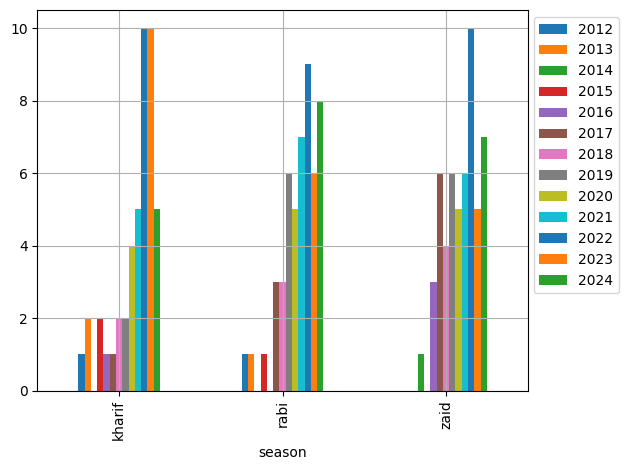

In [153]:
plt.figure(figsize=(14,8))
season_samples_df.plot(kind='bar',grid=True)
plt.legend(bbox_to_anchor=(1.2, 1),loc='upper right')
plt.tight_layout()

In [145]:
neighboring_wb_df[(neighboring_wb_df['season'] == 'kharif') & \
                  (neighboring_wb_df['agri_year'].isin([2017,2022]))]

,date,Water Spread Area (Ha),Capacity (Mcum),season,agri_year,month
13,2017-10-01,2.3,0.0,kharif,2017,10
78,2022-07-01,0.1,0.0,kharif,2022,7
79,2022-07-16,0.0,NaN,kharif,2022,7
80,2022-08-01,0.3,0.0,kharif,2022,8
81,2022-08-16,0.6,0.0,kharif,2022,8
82,2022-09-01,0.5,0.0,kharif,2022,9
83,2022-08-16,0.6,0.0,kharif,2022,8
84,2022-09-16,0.4,0.0,kharif,2022,9
85,2022-10-01,1.9,0.0,kharif,2022,10
86,2022-10-16,1.8,0.0,kharif,2022,10


In [146]:
area_mean_by_season_df = neighboring_wb_df.groupby(['agri_year','season'])['Water Spread Area (Ha)'].mean().reset_index()

In [147]:
area_mean_by_season_df = area_mean_by_season_df.pivot(index='agri_year',columns='season',values='Water Spread Area (Ha)')

In [148]:
area_mean_by_season_df

season,kharif,rabi,zaid
agri_year,,,
2012,0.000,1.300000,NaN
2013,0.000,1.600000,NaN
2014,NaN,NaN,0.700000
2015,0.800,1.100000,NaN
2016,0.000,NaN,0.633333
2017,2.300,0.300000,0.683333
2018,1.300,1.033333,0.775000
2019,0.450,0.250000,0.000000
2020,0.225,0.000000,0.160000


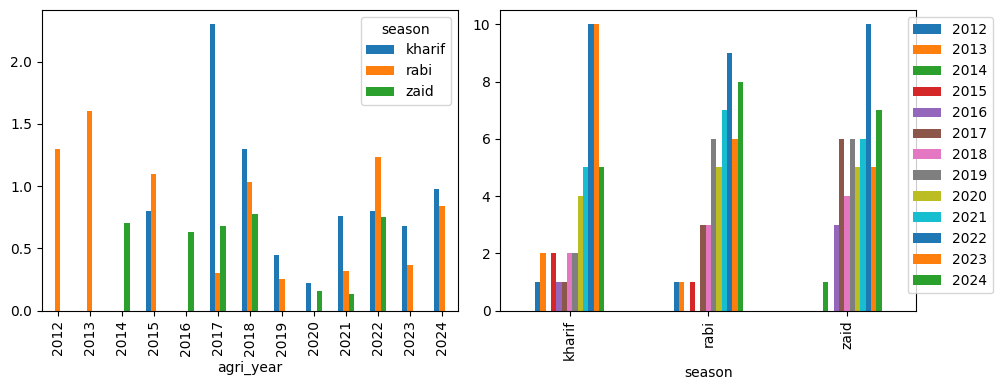

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize = (10,4))
area_mean_by_season_df.plot(kind = 'bar',ax=axes[0])
season_samples_df.plot(kind='bar',ax=axes[1])
plt.legend(bbox_to_anchor=(1.2, 1),loc='upper right')
plt.tight_layout()

In [150]:
neighboring_wb_df[neighboring_wb_df['agri_year'] == 2017]

,date,Water Spread Area (Ha),Capacity (Mcum),season,agri_year,month
13,2017-10-01,2.3,0.0,kharif,2017,10
14,2017-12-16,0.0,NaN,rabi,2017,12
15,2018-01-16,0.9,0.0,rabi,2017,1
16,2018-02-01,0.0,NaN,rabi,2017,2
17,2018-03-01,0.8,0.0,zaid,2017,3
18,2018-03-16,0.7,0.0,zaid,2017,3
19,2018-04-01,0.0,NaN,zaid,2017,4
20,2018-04-16,0.6,0.0,zaid,2017,4
21,2018-05-01,0.0,NaN,zaid,2017,5
22,2018-06-01,2.0,0.0,zaid,2017,6


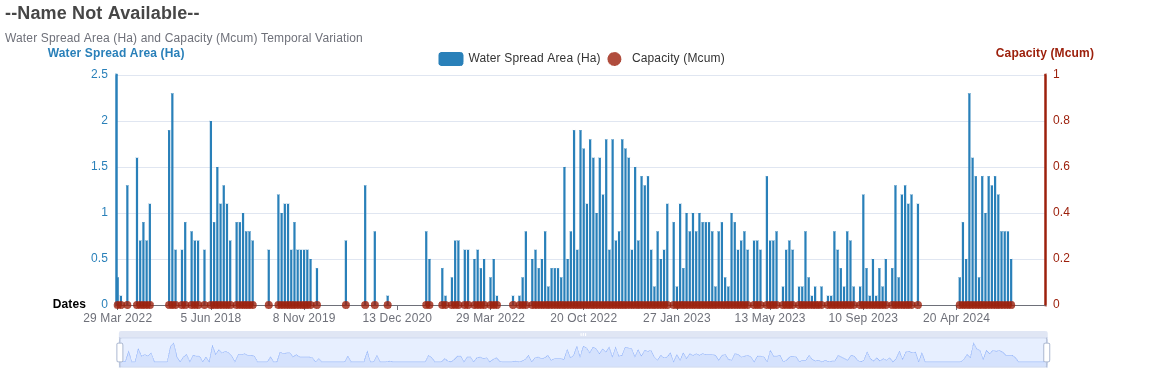

### Run IndiaSAT on the neighboring polygon
* Done on EE

### Naychaha Talab

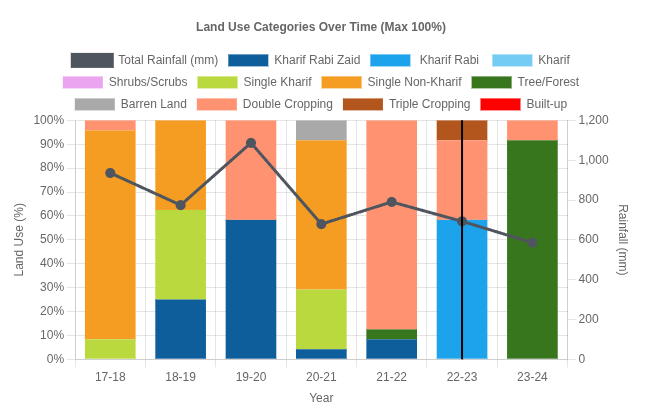

In [ ]:
vv_collection = S1\
    .filterBounds(swb_fc.geometry())\
    .filterDate(START_DATE,END_DATE)\
    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV'))\
    .select('VV');

In [ ]:
# Normalize the year to a common year (e.g., 2000) for plotting
vv_timeseries_yearwise_df['norm_date'] = vv_timeseries_yearwise_df['date'].apply(lambda dt: dt.replace(year=2000))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data for each year
for year, group in vv_timeseries_yearwise_df.groupby(vv_timeseries_yearwise_df['date'].dt.year):
    ax.plot(group['norm_date'], group['vv_mean'], label=str(year))

# Format the x-axis to show only month and day
date_format = mdates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(date_format)

# Add labels and title
ax.set_xlabel("Month and Day")
ax.set_ylabel("vv_mean")
ax.set_title("Comparison of VV Across Years")
ax.legend(title="Year")
ax.grid(True)

plt.tight_layout()
plt.show()